<a href="https://colab.research.google.com/github/rjy1022/my_assets/blob/main/Neural_Networks_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets first import libraries we will need for these tasks. Note that we import the ```keras``` package here. ```keras``` is a wrapper package around tensorflow - a python library for creating deep learning models.  Or, perhaps it would be better to say that the tensorflow library facilitates working with models that use a lot of tensors (i.e., n-dimensional matrices), making tensor manipulation easier. Working with tensorflow natively is a bit tedious, so we will work with ```keras```, which can handle most basic machine learning operations.

In [ ]:
!nvidia-smi
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical
from umap import UMAP

Sat Nov 14 10:47:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# @title Helper Functions & Figure Settings


import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/NMA2020/nma.mplstyle")


def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(10):
    for k2 in range(10):
      k = k + 1
      plt.imshow(X[k],
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255,cmap='gray')
  plt.xlim((10 * 28, 0))
  plt.ylim((10 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 255])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  Z = np.zeros((28*8,28*16))
  k = 0
  for i in range(8):
    xstart = 0 + i*28
    xend = (i+1)*28
    for j in range(16):
      ystart = 0 + j*28
      yend = (j+1)*28
      Z[xstart:xend,ystart:yend] = np.real(np.reshape(weights[k,:], (28, 28)))
      k += 1
  #plt.imshow(np.real(np.reshape(weights[i,:], (28, 28))), cmap=cmap)
  plt.imshow(Z,cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()

## Loading the MNIST dataset

We'll now load the MNIST dataset of hand-drawn digits using ```keras``` (which, like ```scikitlearn```, has several example data sets associated with it).

Training data shapes 	 trainX : (60000, 28, 28) 	 trainY : (60000,)
Testing data shapes 	 testX  : (10000, 28, 28) 	 testY : (10000,)


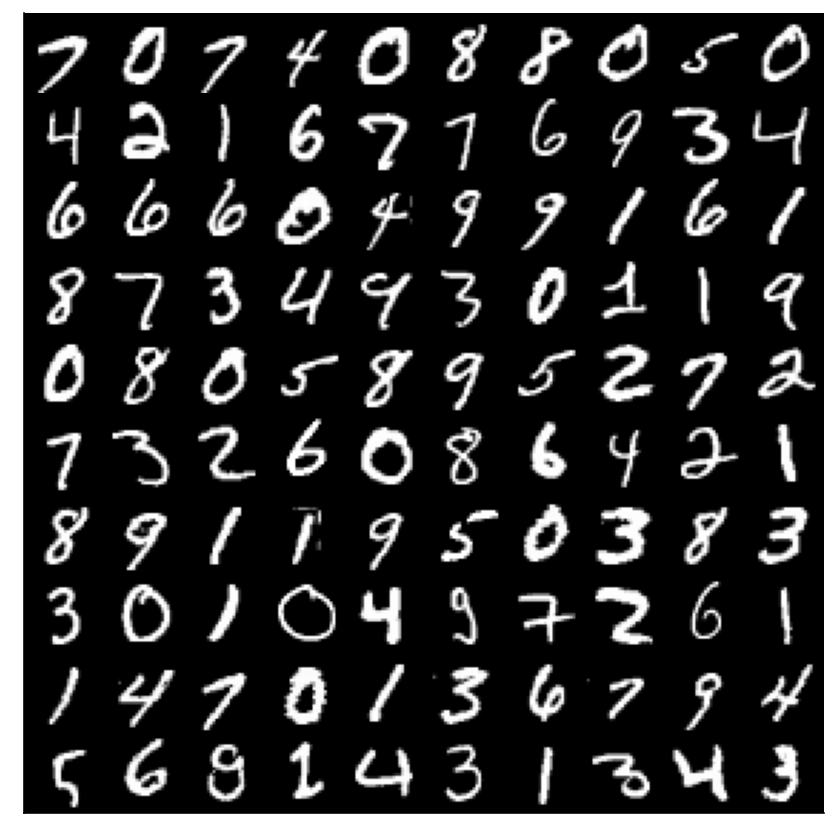


 Numpy array type : uint8	Min : 0	Max : 255




<module 'keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/keras/datasets/mnist.py'>

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print('Training data shapes \t trainX : %s \t trainY : %s'%(trainX.shape, trainY.shape))
print('Testing data shapes \t testX  : %s \t testY : %s'%(testX.shape, testY.shape))


plot_MNIST_sample(trainX);
print('\n Numpy array type : %s\tMin : %s\tMax : %s\n\n'%(trainX[0].dtype, trainX[0].min(), trainX[0].max()))

mnist

The internal function for loading MNIST dataset in ```keras``` splits the data into training and test sets on its own! Note that these are exclusive, that is, there are no common samples between the test and training sets - as it should be!

So as we see, ```(trainX, testX)``` contains 28px-by-28px images and ```(trainY, testY)``` is a list of integers - corresponding to the digit identified in the images in ```(trainX, testX)```.

Another thing to keep in mind is the data format of the images. We see that pixel values in the first image range from 0 to 255. This is a common format for 8-bit grayscales images in which a pixel value of 0 corresponds to white and 255 corresponds to black. Values between 0 and 255 vary linearly from white to black (shades of gray).

## Preprocessing the MNIST Data

For most machine learning applications, properly formatting the X and Y data makes training models much faster and efficient. Currently the pixel values in our images (```trainX``` and ```testX```) range from 0 to 255 and we will divide all pixel values by 255 to scale them from 0 to 1. In most cases, normalizing all input data from 0 to 1 helps the model train faster.


In [ ]:
if trainX.max() < 2:
    print('It seems like trainX is already normalized. Maybe you are running this cell a second time?')
else:    
    trainX = trainX/255.0
    testX = testX/255.0

Next, we need to consider how we would choose our objective or loss function given the integers in our Y data. This loss function determine the 'penalty' when our network makes a wrong prediction. Say we choose absolute difference between the true value and the network prediction - $|y - y_{pred}|$ - this penalty would be much larger when ($y$, $y_{pred}$) are (9, 2) versus when they are (9, 7). From our perspective, the model is equally bad when it predicts 2 or 7 for an image containing 9, and so the penalty should be equal. 
One way to get around this is to convert the integer values that identify digits in the images to **one-hot encoded** vectors, for example  
  
0 becomes [1,0,0,0,0,0,0,0,0,0]  
1 becomes [0,1,0,0,0,0,0,0,0,0]  
.  
.  
9 becomes [0,0,0,0,0,0,0,0,0,1]  
  
We can think of this as converting the integer digits to a discrete probability distribution. We can then use the categorical cross-entropy loss function which has a nicer mathematical form that weighs wrong network predictions equally.

We will also reshape our images from a matrix of shape 28-by-28 to a vector of length 784, as it makes defining the input layer of our model easier.

In [ ]:
if len(testY.shape)>1:
    print('It seems like trainY is already converted to categorical. Maybe you are running this cell a second time?')
else:
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    
trainX = trainX.reshape((trainX.shape[0], -1))
testX = testX.reshape((testX.shape[0], -1))

print('\nTraining data shapes \t trainX : %s \t trainY : %s'%(trainX.shape, trainY.shape))
print('Testing data shapes \t testX  : %s \t testY : %s'%(testX.shape, testY.shape))



Training data shapes 	 trainX : (60000, 784) 	 trainY : (60000, 10)
Testing data shapes 	 testX  : (10000, 784) 	 testY : (10000, 10)


## Our first deep learning model

When working with ```keras```, we can think of different kind of layers as lego blocks. We need to join these blocks together to make a complete model. Note that like lego blocks, not all layers can be joined with each other (although that often doesn't stop us from trying!). We will look at examples of this in further tutorials. 

Okay then lets define our first deep learning model! To start, our model will have one hidden layer. Here is a what our model should looks like.


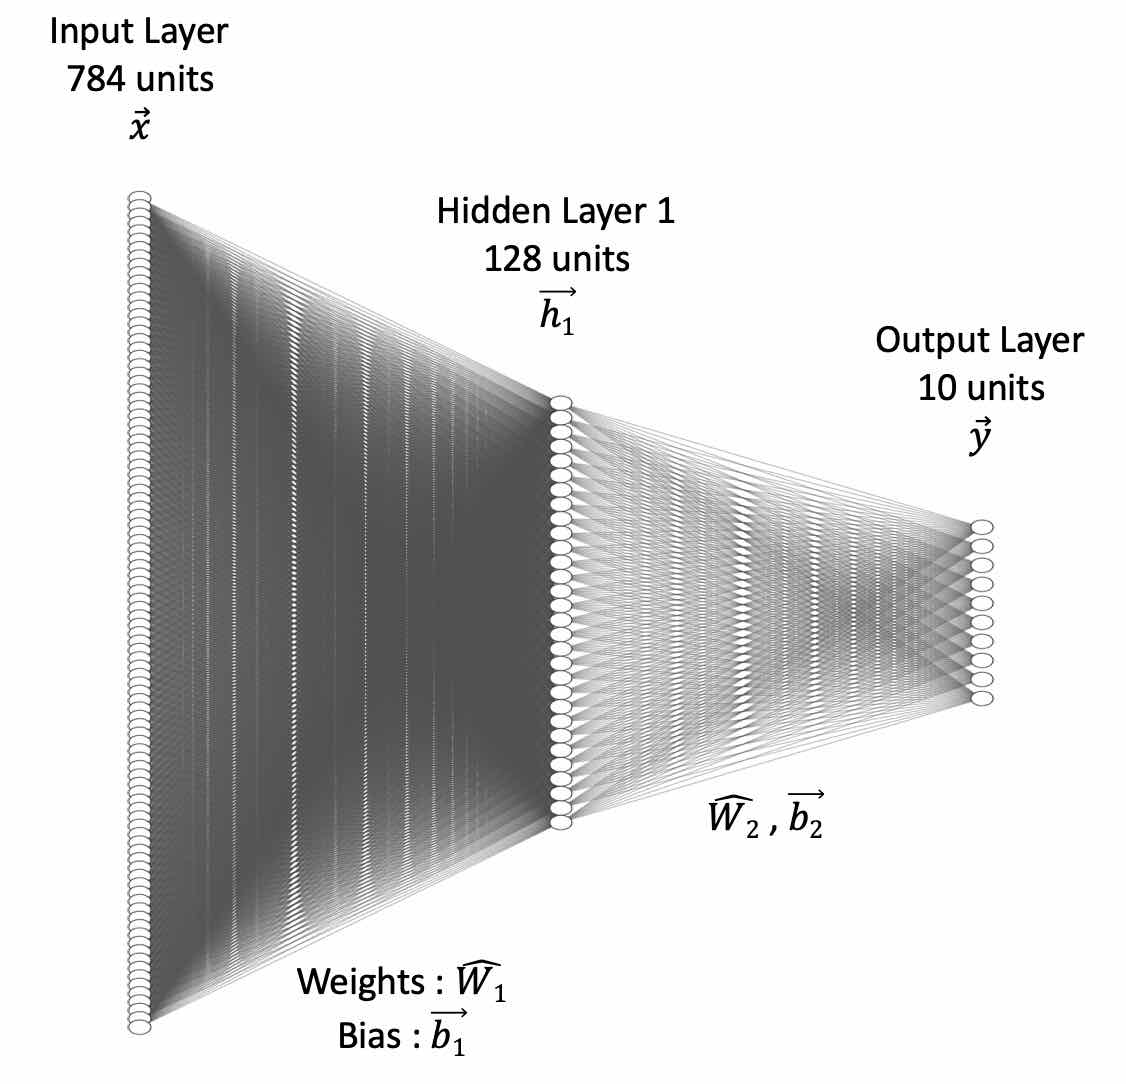

As we discussed in lecture, 


> $\vec{h}_1 = \phi_1(W_1\vec{x} + \vec{b}_1)$   
$\vec{y} = \phi_2(W_2\vec{h}_1 + \vec{b}_2)$

with $\phi_1$ and $\phi_2$ being the **activation functions** (e.g., sigmoid, tanh, ReLU, etc.). 

As the network trains, the parameters (all **W**s and **b**s) are updated to minimize the loss function. Note that the terms '**weights**' and 'variables' are also commonly used in ML literature to refer to all **W**s and **b**s.  



<font color="blue"> **Question #1** : What are the shapes of $W_1$, $b_1$, $W_2$, and $b_2$ for the network shown in the image above, given than $x$ is an $784\times 1$ vector?



<font color="green"> Type your answer to Question #1 here

W1 will have a shape of 784 x 128.
b1 will have a shape of 128 x 1.
W2 will have a shape of 128 x 10.
b2 will have a shape of 10 x 1. </font>

# Creating the model architecture with Keras



We will start by adding an input layer (```inp_layer```) - this represents our input data (X) which is now a vector of length 784. We declare this shape as an argument when making the input layer. Defining an input layer is the first step when creating any deep learning model.

Next we define our hidden layer (```h1```) which is densely connected (or fully connected) to our input layer, hence we use ```k.layers.Dense``` to define our hidden layer. We will have 128 neurons (or units) in our hidden layer. Note that we mention ```inp_layer``` at the end to tell ```keras``` we need to join this layer after the input layer.

Finally, we create the output layer (```out_layer```). Since our outputs (```Y```) are one-hot encoded vectors of length 10, we create a dense layer with 10 neurons. 

Note that we need to define various arguments when initializing the dense  layers. A good practice is creating a habit of looking up these on the ```keras``` api documentation [here](https://keras.io/api/layers/core_layers/dense/). These might be quite a lot to look at, but we've set most of them to ```None``` and these are irrelevant in our current model.

Also, note we choose no activation function for the hidden layer, but have selected a softmax activation for the output layer. The softmax function is:  
\begin{equation} 
\phi_{softmax}(y_i) = \dfrac{e^{y_i}}{\sum_j e^{y_j}}, 
\end{equation}
which is useful in converting the last layer's values into a probability distribution (note that $\sum_i \phi_{softmax}(y_i) = 1$).

In [ ]:
def graph_1():
    inp_layer = Input(shape=(784))
    
    h1 = Dense(units=128, activation=None, use_bias=True, kernel_initializer="random_normal",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(inp_layer)

    out_layer = Dense(units=10, activation='softmax', use_bias=True, kernel_initializer='random_uniform',
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h1)

    model = Model(inputs = [inp_layer], outputs=[out_layer])
    return model 

We now create our model by calling the first_model() function.



In [ ]:
model1 = graph_1()

## Model Weights

Calling model.weights returns a list of all the model weights, and we can see their name and shape as shown below. 

Note : Tensorflow calls **W** variables as kernels (instead of weights) to simultaneously both avoid and add confusion. 

In [ ]:
for w in model1.weights:
  print('Name : %s\t\tShape : %s'%(w.name, w.numpy().shape))

Name : dense/kernel:0		Shape : (784, 128)
Name : dense/bias:0		Shape : (128,)
Name : dense_1/kernel:0		Shape : (128, 10)
Name : dense_1/bias:0		Shape : (10,)


We can also get a summary of the model by calling ```model.summary()```. Other useful commands are ```model.input_shape``` and ```model.output_shape``` (which are somewhat self-explanatory).

In [ ]:
model1.summary()

print('\n\nInput Shape : %s'%(model1.input_shape,))

print('\n\nOutput Shape : %s'%(model1.output_shape,))

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Input Shape : (None, 784)


Output Shape : (None, 10)


## Batchsize and Epochs

The ```None``` values in these shapes are in place for the value of ```batchsize``` that is chosen when training and predicting from the model. As we can see, the weights and biases are nicely defined for our network, so batchsize doesn't affect the number of parameters in the network or its architecture - just how the parameters are learned.  

```batchsize``` is the number of samples that are simulataneously *processed* by the network while training or predicting (the size of the **minibatch** from lecture). During training, the gradients calculated for back-propogation are averaged over all the samples contained in a batch. Another way to say it is that only one calculation of the gradient occurs for a batch, so the gradients for that batch are averaged for predictions on all the samples in that batch.

For example, if you have 150 samples in the training set and the batchsize is 10, the network will make prediction for the first 10 samples (i.e., the first batch), calculate the error from these predictions and calculate the gradients. These gradients are then averaged over all samples in the batch for backpropgation, and parameter/weight updates would be calculated. After updating the weights, the next 10 samples (or the second batch) would be predicted, gradients would be calculated, and so on. Thus, in total, with batchsize 10, there would be 15 batches for 150 training samples - and 15 weight updates after processing each batch. The processing of all 15 batches and gradient updates would then mark an **epoch**. 

**Note** that backpropogation is a computationally expensive task, so breaking the training set up into batches leads to quicker gradient updates and (usually) faster convergence.  This process of splitting-up the data into batches is usually called **Stochastic Gradient Descent (SGD)**. 

During *prediction*, the batchsize again determines how many samples are predicted simultaneously, and it is useful in cases where we need to perform some action after each batch is processed - such as saving predictions on disk in case we have a lot of data and the predictions wouldn't fit in the memory.


<font color="blue"> **Question #2**: Describe some of the potential trade-offs between choosing a large vs. a small batchsize. </font>

<font color=green>Type your answer for Question #2 here 

As batchsize increases, our gradient updates become more accurate. Ideally, we'd be able to compute the gradiate update based on all of the samples in our training set, as we would then move perfectly towards our local minima. However, since computational complexity increases exponentially with number of samples, we split this process into multiple batches so that we can achieve gradient descent faster. 
</font>

## Compiling, Optimizers and Losses

We now need to '[compile](https://keras.io/api/models/model_training_apis/#compile-method)' our model. This is step required by keras before we can train a model. Here, we need to define our optimizer (```sgd``` here stands for stochastic gradient descent) and the loss function. We can also specify any metrics we need keras to calculate after each epoch. The accuracy metric tells us what fraction of samples are correctly predicted by the model.

You should look at the choices of [optimizers](https://keras.io/api/optimizers/#available-optimizers) and [losses](https://keras.io/api/losses/) available in keras.

While choosing a loss metric is determined by how the output data is formatted and what is our objective with the dataset, we have a free choice over all available optimizers. They all have their strengths and weaknesses, and the correct choice often depends on factors such as the loss function, data format, and model architecture.  


In [ ]:
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


## Training 

Run the code cell below for some helper functions:

In [ ]:
#@title Helper Functions
from matplotlib import animation, rc
rc('animation', html='jshtml')
from IPython.display import HTML
from keras.callbacks import Callback
import matplotlib.gridspec as gridspec

class SaveWeights(Callback):
    def __init__(self, interval=1):
        self.interval = interval
      
    def on_train_begin(self, logs=None):
        self.weights = []
        self.weights.append([w.numpy()+w.numpy().min() for w in self.model.weights if 'bias' not in w.name])

    def on_epoch_end(self, epoch, logs=None):
        if epoch%self.interval == 0:
            self.weights.append([w.numpy()+w.numpy().min() for w in self.model.weights if 'bias' not in w.name])
    
    def on_train_end(self, batch, logs=None):
        n_Weights = len(self.weights[0])
        fig, axes = plt.subplots(1, n_Weights, figsize=(1.5*n_Weights,5))
        axes = axes.flatten()
        ims = []
        for i in range(n_Weights):
            ax = axes[i]
            ax.set_title(r'$W_%i$'%(i+1))
            
        for t in range(len(self.weights)):
            ims_t = []
            for i in range(n_Weights):
                ax = axes[i]
                weights = self.weights[t]
                w = weights[i]
                w = np.atleast_2d(w)
                if w.shape[1] == 1:
                    w = w.T
                im = ax.imshow(w, cmap='Greys', animated=True)
                ims_t.append(im)
            ims.append(ims_t)
        self.anim = animation.ArtistAnimation(fig, ims, interval=33, blit=True,
                                              repeat_delay=1000)
        pass
    def animate(self):
      return self.anim


def plot_training_history(hist):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(hist.history['loss'], label='Training Loss', color='firebrick')
    ax.plot(hist.history['val_loss'], label='Validation Loss', color='royalblue')
    ax.legend(loc='center right')
    ax.set_ylabel("loss")
    ax.set_xlabel("Epoch #")    
    if 'val_accuracy' in hist.history.keys():
        ax2 = ax.twinx()
        ax2.plot(hist.history['accuracy'], '--', label='Training Accuracy', color='firebrick', )
        ax2.plot(hist.history['val_accuracy'], '--', label='Testing Accuracy', color='royalblue')
        ax2.legend(loc='lower left')
        ax2.set_ylabel("accuracy")
weights_list = SaveWeights()

To train the model, we call [model.fit](https://keras.io/api/models/model_training_apis/#fit-method). 

Recall that we have 60000 samples in the training set and 10000 samples in the test set. We set our batchsize as 200 and the number of epochs as 50. We can also specify ```(testX, testY)``` as our validation set, and the model will evaluate the loss and accuracy metrics on this validation set after each epoch is completed. **Note** that the model will not use the ```validation_data``` for training.  

We also use a helper object ```weights_list``` put into the callbacks list.  This object stores the model weights after each epoch. We can then look at how weights evolved after training. We store the training history in the ```hist``` object.

In [ ]:
hist1 = model1.fit(trainX, trainY, batch_size=200, epochs=50, 
                 validation_data=(testX, testY), callbacks=[weights_list])


The training output tells us the loss and accuracy values for training and validation set after each epoch. Note that we want a loss value closer to 0 and accuracy value closer to 1. 

We can now call ```weights_list.animate()``` to see an animation of how the weights changed.

In [ ]:
weights_list.animate()

We can also plot the loss and accuracy value by calling **plot_training_history(hist)** with the hist object created while training.

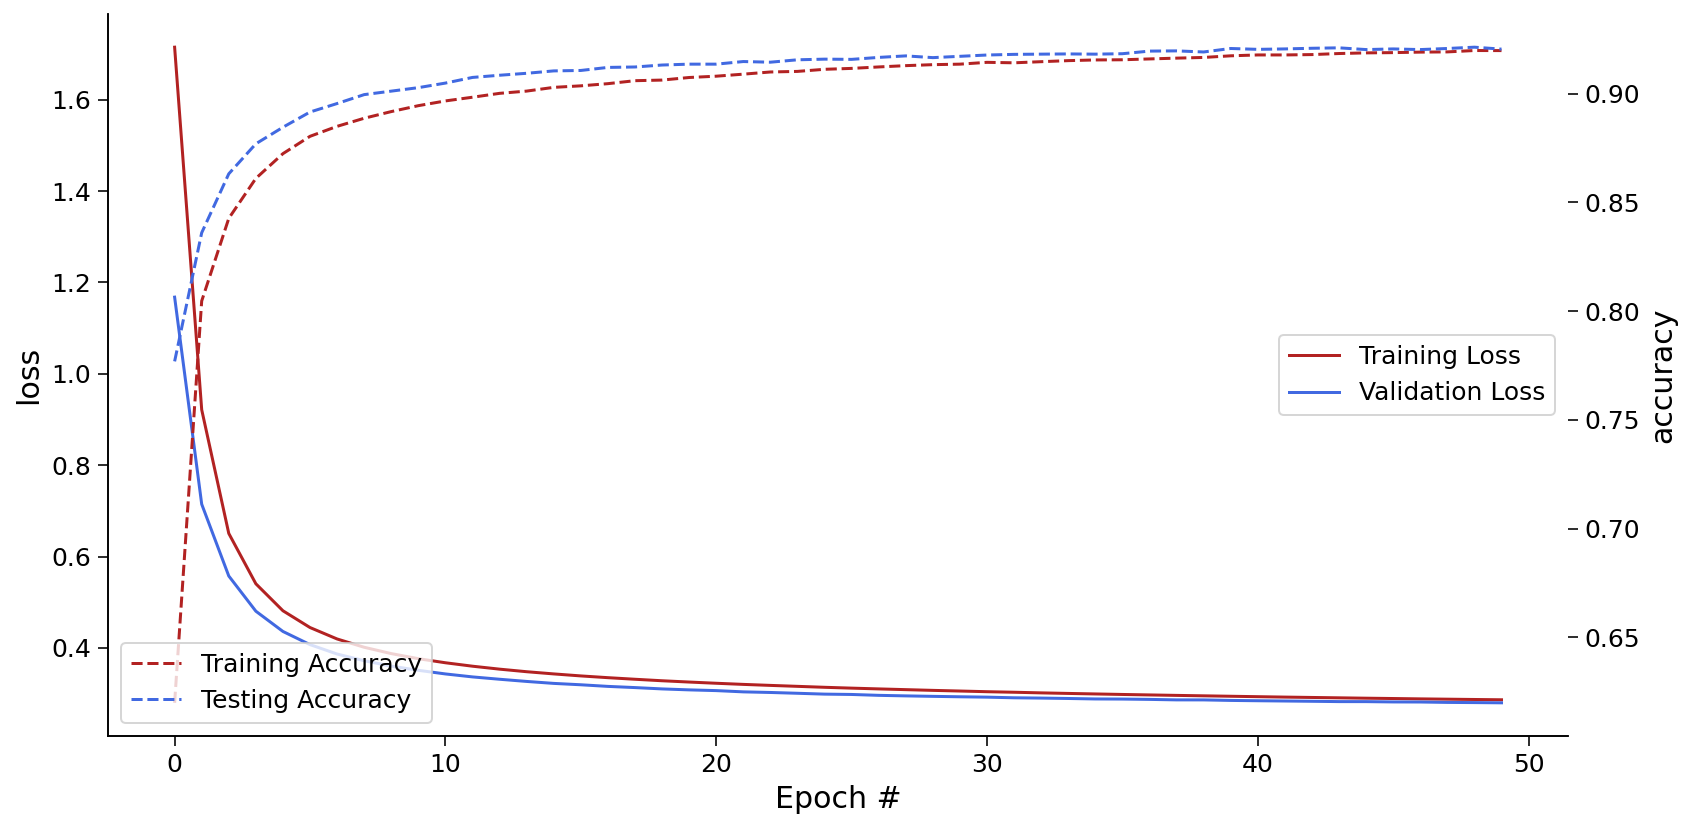

In [ ]:
plot_training_history(hist1)

## Prediction

We can get the predictions on our test set using ```model.predict()```

Both ```testY``` and model predictions are probability distributions, so to compare these we can use [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)  

In [ ]:
print(testX.shape)
predictions = model1.predict(testX)
print(predictions.shape)

predicted_digits = np.argmax(predictions, axis=1)
test_digits = np.argmax(testY, axis=1)

(10000, 784)
(10000, 10)


In [ ]:
print(predicted_digits, test_digits)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


In [ ]:
accuracy = np.sum(predicted_digits==test_digits)/len(test_digits)
print('Accuracy is %0.04f'%(accuracy))

Accuracy is 0.9204


## Evaluation

Another way to get accuracy is by calling [model.evaluate](https://keras.io/api/models/model_training_apis/#evaluate-method), which returns both the loss and accuracy values.

In [ ]:
model1.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.2799 - accuracy: 0.9204


[0.27986517548561096, 0.9204000234603882]

<font color = blue> **Question #3**: Define a new function called ```graph_2()``` that creates a new model architecture with two hidden layers, the first containing 256 neurons and the second containing 64 neurons. Use no activation function for the first layer, and select an activation function from [here](https://keras.io/api/layers/activations/#available-activations) for the second layer. 
Use ```glorot_uniform``` as the ```kernel_initializer``` for all dense layers.
Use the argument values from ```graph_1()``` for all other arguments in the Dense layers. 

In [ ]:
#Type code for Question #3 here





def graph_2():
    inp_layer = Input(shape=(784))
    
    h1 = Dense(units=256, activation=None, use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(inp_layer)

    h2 = Dense(units=64, activation='relu', use_bias=True, kernel_initializer='glorot_uniform',
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h1)

    out_layer = Dense(units=10, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform',
                    bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                    activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h2)

    model = Model(inputs = [inp_layer], outputs=[out_layer])
    return model 

<font color = blue> **Question #4**: Create a model using ```graph_2()``` (call it model2) and train the network with the MNIST dataset for 50 epochs with 200 batchsize using the ```sgd``` optimizer.  Evaluate the model and compare its accuracy with that of ```model1``` above.

In [ ]:
#Type code for Question #4 here
model2 = graph_2()
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(trainX, trainY, batch_size=200, epochs=50, 
                 validation_data=(testX, testY), callbacks=[weights_list])

<font color=green> Evaluate the model and compare its accuracy with that of ```model1``` above. 

Accuracy for this model looks to be about 3-4% higher than the accuracy of the previous model. The loss is 14% is smaller.
</font>

<font color=blue> **Question #5**: Create a different model instance using ```graph_2()``` (call it ```model3```) and train the network with MNIST dataset for 50 epochs with 200 batchsize using the ```adam``` optimizer.
Evaluate the model and compare its accuracy with ```model1``` and ```model2```. 

In [ ]:
#Type code for Question #5 here
model3 = graph_2()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist3 = model2.fit(trainX, trainY, batch_size=200, epochs=50, 
                 validation_data=(testX, testY), callbacks=[weights_list])

<font color="green"> Evaluate the model and compare its accuracy with ```model1``` and ```model2```. 


This optimizer improves on model 2's optimizer about ~1.5%, and improves on model 1 by about 4.5%. </font>

<font color=blue> **Question #6**: Which optimizer trains the ```model3``` the fastest (i.e., in the smallest number of epochs)?

In [ ]:
plot_training_history(hist2)
plot_training_history(hist3)

<font color=green>Type your answer to Question #6 here

From the graphs above, we can see that with the adam optimizer, we cross 90% accuracy after the first epoch, whereas with sgd, it takes us around 5 epochs to cross the same boundary.

</font>

## Is deep learning magic or what?!?

Now I don't know about you, but I'm pretty impressed with the capabilities of our model here. But as John von Neumann once [said](http://wavefunction.fieldofscience.com/2015/02/derek-lowe-to-world-beware-of-von.html):

> 'With four parameters I can fit an elephant, and with five I can make him wiggle his trunk!'

When we print the shape of weights for our ```graph_1``` model, we see close to 100,000 parameters! 

Run the cell below, where we define a deep model with 4 hidden layers and train it with 10,000 training sample and validate on 1,000 test set example from the MNIST dataset - but here's the catch! - we now shuffle the Y data for these datasets such that the integers identifying the digits are randomly shuffled. Thus, there shouldn't be any discernable structure to find!

We'll call this model ```model_deep_shuffled```.




In [ ]:
def graph_deep():
    inp_layer = Input(shape=(784))
    
    h1 = Dense(units=512, activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(inp_layer)

    h2 = Dense(units=256, activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h1)
    
    h3 = Dense(units=128, activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h2)
                        
    h4 = Dense(units=64, activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h3)

    out_layer = Dense(units=10, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform',
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h4)

    model = Model(inputs = [inp_layer], outputs=[out_layer])
    return model

train_inds = np.random.choice(np.arange(trainX.shape[0]), replace=False, size=10000)
test_inds = np.random.choice(np.arange(testX.shape[0]), replace=False, size=1000)

trainY_shuffled = trainY[train_inds]
testY_shuffled = testY[test_inds]

model_deep_shuffled = graph_deep()
model_deep_shuffled.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist_deep_shuffled = model_deep_shuffled.fit(trainX[:10000], trainY_shuffled, batch_size=200, epochs=50, 
                 validation_data=(testX[:1000], testY_shuffled), callbacks=[weights_list])
plot_training_history(hist_deep_shuffled)

<font color="blue"> **Question #7**: What is the accuracy for this model? Is it a better model than the models you have trained previously? Why or why not might this be the case?

<font color=green> Type your answer to Question #7 here 

The training accuracy is more accurate than our previous models but this is because we're overfitting by quite a bit, which would allow us to fit any training dataset. The testing accuracy is horrible (~5%).</font>

# Feature extraction

Let's go back to out previous single-hidden-layer model (```model1```) and try to see what was going on inside of the network.

Specifically, we xcan extract the hidden layer neuron values ($\vec{h}_1$) as we generate predictions using the a model. To get the hidden layer values from ```model1```, let's define ```model1_h``` using ```model1``` as follows:

In [ ]:
model1_h = Model(inputs=model1.inputs, outputs=[layer.output for layer in model1.layers])
print(model1_h.summary())

print('Outputs are : ',model1_h.output_shape)

Note that we get 3 outputs from ```model1_h```, which are the neuron values at the input layer, hidden layer and the output layer, respectively. Values at the input layer are just the X values, and values at the output layer are the model predictions (expressed as a discrete probability distribution) for each of the 10,000 training examples (as demonstrated below).

In [ ]:
out = model1_h.predict(testX)
[o.shape for o in out]

<font color=blue> **Question #8**: Use UMAP to find a 2-dimensional representation, ```Y```, of the hidden layer activations in ```model1``` (```out[1]``` above), and use ```plt.scatter(Y[:,0], Y[:,1], c=np.argmax(testY, 1), cmap='tab10', alpha=0.3, s=20, edgecolors=None)``` to plot the results as a colored scatterplot.  How do these results compare to your UMAP embeddings of the raw MNIST data from notebook #3?</font>

In [ ]:
#Type your code for Question #8 here
print(out[1])
umap_example = UMAP(n_neighbors = 15, n_components = 2)
Y = umap_example.fit_transform(out[1])

plt.scatter(Y[:,0], Y[:,1], c=np.argmax(testY, 1), cmap='tab10', alpha=0.3, s=20, edgecolors=None)
plt.plot()

NameError: ignored

<font color = green> How do these results compare to your UMAP embeddings of the raw MNIST data from notebook #3? 

The results here are much better than they were in notebook #3, as the clusters are much tighter. It's not surprising that umap still found clear structure in the data.</font>

<font color = blue> **Question #9**: Create a new instance of ```graph_deep()```, but now use it to train on the *unshuffled* data, and train it using the same parameters as used in ```model_deep_shuffled``` above.

In [ ]:


#Type your code for Question #9 here
def graph_deep():
    inp_layer = Input(shape=(784))
    
    h1 = Dense(units=512, activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(inp_layer)

    h2 = Dense(units=256, activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h1)
    
    h3 = Dense(units=128, activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h2)
                        
    h4 = Dense(units=64, activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h3)

    out_layer = Dense(units=10, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform',
                        bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(h4)

    model = Model(inputs = [inp_layer], outputs=[out_layer])
    return model

model_deep = graph_deep()
model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist_deep = model_deep.fit(trainX, trainY, batch_size=200, epochs=50, 
                 validation_data=(testX, testY), callbacks=[weights_list])
plot_training_history(hist_deep)


<font color=blue> **Question #10**: Extract the hidden unit activation values from the model from Question #9, and use UMAP to plot the resulting activations in a 2-dimensional embedding for each hidden layer (seperately).  Describe how the activation values are changing as you move from the first to the last hidden layer.  (Note, you can pick the only the first 5,000 examples from each layer to speed-up the computation)

In [ ]:
#Type Code for Question #10 here
model1_new = Model(inputs=model_deep.inputs, outputs=[layer.output for layer in model_deep.layers])

out = model1_new.predict(testX)
[o.shape for o in out]

for x in range(1,5):
  umap_example = UMAP(n_neighbors = 15, n_components=2)

  #Fits the model and returns back the low-dimensional projections
  Y = umap_example.fit_transform(out[x])

  plt.figure()
  plt.scatter(Y[:,0], Y[:,1], c=np.argmax(testY, 1), cmap='tab10', alpha=0.3, s=20, edgecolors=None)
  plt.title("Output Layer #{}".format(x+1))
  plt.plot()

<font color=green> Describe how the activation values are changing as you move from the first to the last hidden layer. 

As we move from the first to the last hidden layer, we see that the activation values become closer and closer to the desired structure, and this is because the model is in process of bringing them closer to the their final digit prediction. </font>